<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data_multi_delta_(_2)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-2'

In [4]:
os.listdir(base_path)

['data_multi_delta_-2_n20.csv',
 'data_multi_delta_-2_n30.csv',
 'data_multi_delta_-2_n60.csv',
 'data_multi_delta_-2_n120.csv',
 'data_multi_delta_-2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,51.839124,91.194922,-0.016175,153.017871,153.037623,-0.019752
1,0.0,1.0,27.574247,64.441475,-0.021129,101.994593,102.016165,-0.021572
2,0.0,2.0,32.395087,67.737688,0.011972,110.144748,110.133625,0.011123
3,0.0,3.0,88.510700,60.538365,0.024148,159.073213,159.049754,0.023459
4,0.0,4.0,61.421552,63.672799,-0.030353,135.063998,135.095082,-0.031084
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,28.305935,31.531126,0.043904,69.880965,69.835927,0.045038
119996,999.0,116.0,58.469893,48.816975,-0.000200,117.286668,117.288997,-0.002329
119997,999.0,117.0,42.453628,77.408777,-0.009547,129.852859,129.862269,-0.009410
119998,999.0,118.0,85.542884,23.061880,-0.003975,118.600788,118.610404,-0.009616


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,51.839124,91.194922,-0.016175,153.017871,153.037623,-0.019752
1,0.0,1.0,27.574247,64.441475,-0.021129,101.994593,102.016165,-0.021572
2,0.0,2.0,32.395087,67.737688,0.011972,110.144748,110.133625,0.011123
3,0.0,3.0,88.510700,60.538365,0.024148,159.073213,159.049754,0.023459
4,0.0,4.0,61.421552,63.672799,-0.030353,135.063998,135.095082,-0.031084
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,28.305935,31.531126,0.043904,69.880965,69.835927,0.045038
119996,999.0,116.0,58.469893,48.816975,-0.000200,117.286668,117.288997,-0.002329
119997,999.0,117.0,42.453628,77.408777,-0.009547,129.852859,129.862269,-0.009410
119998,999.0,118.0,85.542884,23.061880,-0.003975,118.600788,118.610404,-0.009616


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    51.839124  91.194922 -0.016175  153.017871  153.037623 -0.019752
      1.0    27.574247  64.441475 -0.021129  101.994593  102.016165 -0.021572
      2.0    32.395087  67.737688  0.011972  110.144748  110.133625  0.011123
      3.0    88.510700  60.538365  0.024148  159.073213  159.049754  0.023459
      4.0    61.421552  63.672799 -0.030353  135.063998  135.095082 -0.031084
...                ...        ...       ...         ...         ...       ...
999.0 115.0  28.305935  31.531126  0.043904   69.880965   69.835927  0.045038
      116.0  58.469893  48.816975 -0.000200  117.286668  117.288997 -0.002329
      117.0  42.453628  77.408777 -0.009547  129.852859  129.862269 -0.009410
      118.0  85.542884  23.061880 -0.003975  118.600788  118.610404 -0.009616
      119.0  34.890937  30.920671  0.007189   75.818797   75.811248  0.007549

[120000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    51.839124  91.194922 -0.016175  153.017871  153.037623 -0.019752
      1.0    27.574247  64.441475 -0.021129  101.994593  102.016165 -0.021572
      2.0    32.395087  67.737688  0.011972  110.144748  110.133625  0.011123
      3.0    88.510700  60.538365  0.024148  159.073213  159.049754  0.023459
      4.0    61.421552  63.672799 -0.030353  135.063998  135.095082 -0.031084
...                ...        ...       ...         ...         ...       ...
999.0 115.0  28.305935  31.531126  0.043904   69.880965   69.835927  0.045038
      116.0  58.469893  48.816975 -0.000200  117.286668  117.288997 -0.002329
      117.0  42.453628  77.408777 -0.009547  129.852859  129.862269 -0.009410
      118.0  85.542884  23.061880 -0.003975  118.600788  118.610404 -0.009616
      119.0  34.890937  30.920671  0.007189   75.818797   75.811248  0.007549

[120000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,51.839124,91.194922,-0.016175,153.017871,153.037623,-0.019752
1,0.0,1.0,27.574247,64.441475,-0.021129,101.994593,102.016165,-0.021572
2,0.0,2.0,32.395087,67.737688,0.011972,110.144748,110.133625,0.011123
3,0.0,3.0,88.510700,60.538365,0.024148,159.073213,159.049754,0.023459
4,0.0,4.0,61.421552,63.672799,-0.030353,135.063998,135.095082,-0.031084
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,28.305935,31.531126,0.043904,69.880965,69.835927,0.045038
119996,999.0,116.0,58.469893,48.816975,-0.000200,117.286668,117.288997,-0.002329
119997,999.0,117.0,42.453628,77.408777,-0.009547,129.852859,129.862269,-0.009410
119998,999.0,118.0,85.542884,23.061880,-0.003975,118.600788,118.610404,-0.009616


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    51.839124  91.194922 -0.016175  153.017871  153.037623 -0.019752
      1.0    27.574247  64.441475 -0.021129  101.994593  102.016165 -0.021572
      2.0    32.395087  67.737688  0.011972  110.144748  110.133625  0.011123
      3.0    88.510700  60.538365  0.024148  159.073213  159.049754  0.023459
      4.0    61.421552  63.672799 -0.030353  135.063998  135.095082 -0.031084
...                ...        ...       ...         ...         ...       ...
999.0 115.0  28.305935  31.531126  0.043904   69.880965   69.835927  0.045038
      116.0  58.469893  48.816975 -0.000200  117.286668  117.288997 -0.002329
      117.0  42.453628  77.408777 -0.009547  129.852859  129.862269 -0.009410
      118.0  85.542884  23.061880 -0.003975  118.600788  118.610404 -0.009616
      119.0  34.890937  30.920671  0.007189   75.818797   75.811248  0.007549

[120000 rows x 6 columns]

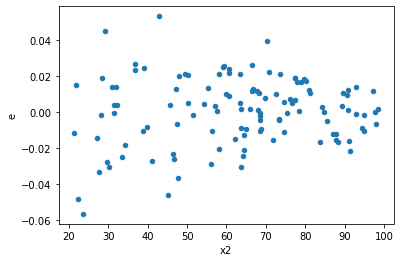

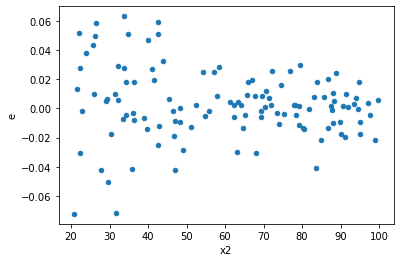

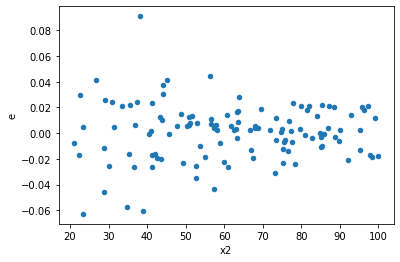

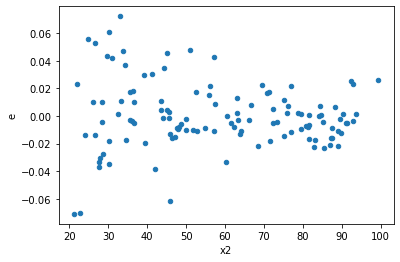

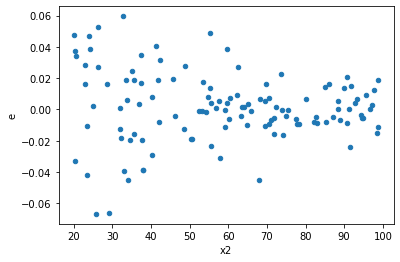

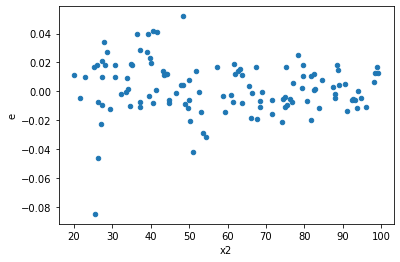

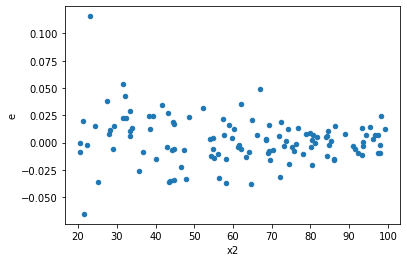

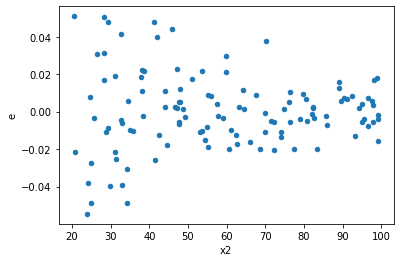

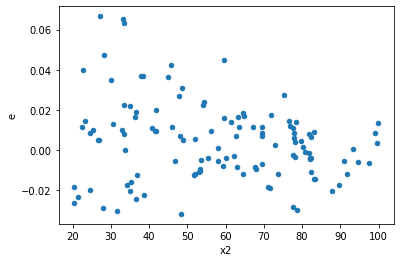

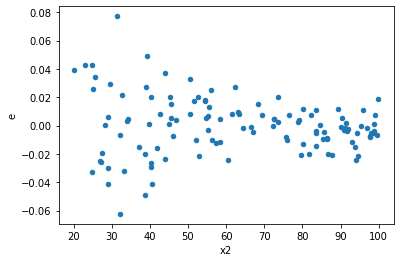

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,46.0,46.0,0.026037803906073465,0.006845349482156328,0.0005660392153494231,0.00014881194526426798,0.2629004161353105,1.3352615031409373e-05,Reject001=0 : Heteroscedasticity
1.0,46.0,46.0,0.052180486606053525,0.009206624922883454,0.0011343584044794244,0.00020014402006268377,0.1764380810089146,3.068519497708457e-08,Reject001=0 : Heteroscedasticity
2.0,46.0,46.0,0.039210953445517865,0.009197452596706422,0.0008524120314243014,0.00019994462166753093,0.23456334999570808,2.606574664891753e-06,Reject001=0 : Heteroscedasticity
3.0,46.0,46.0,0.0510705209161164,0.00830646270853724,0.0011102287155677478,0.0001805752762725487,0.1626469156674679,7.909231296473419e-09,Reject001=0 : Heteroscedasticity
4.0,46.0,46.0,0.04459075795338594,0.006677195742249415,0.000969364303334477,0.0001451564291793351,0.1497439390743164,1.9266507497035856e-09,Reject001=0 : Heteroscedasticity
5.0,46.0,46.0,0.022592263909710017,0.005673091626257502,0.0004911361719502177,0.00012332807883168483,0.25110770876836486,6.993877370716758e-06,Reject001=0 : Heteroscedasticity
6.0,46.0,46.0,0.03692092640989425,0.005596258866023442,0.0008026288349977011,0.00012165780143529221,0.15157417243256738,2.376212008583374e-09,Reject001=0 : Heteroscedasticity
7.0,46.0,46.0,0.03223890508400817,0.005847777680295383,0.0007008457626958297,0.0001271256017455518,0.18138884261290011,4.8255852878729745e-08,Reject001=0 : Heteroscedasticity
8.0,46.0,46.0,0.03088207606843075,0.007204737431358867,0.0006713494797484945,0.00015662472676867102,0.2332983512958807,2.407035361460212e-06,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    999
Reject001=1 : Homoscedasticity        1
Name: Result_test, dtype: int64